In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-placement-dataset-2/placement (1).csv


In [2]:
df = pd.read_csv("/kaggle/input/student-placement-dataset-2/placement (1).csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Package (in LPA)')

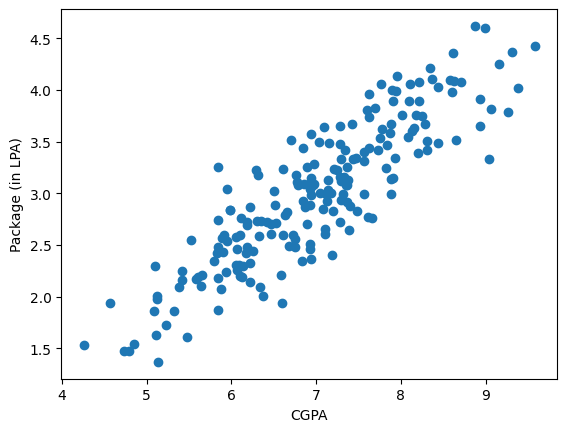

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [11]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [12]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

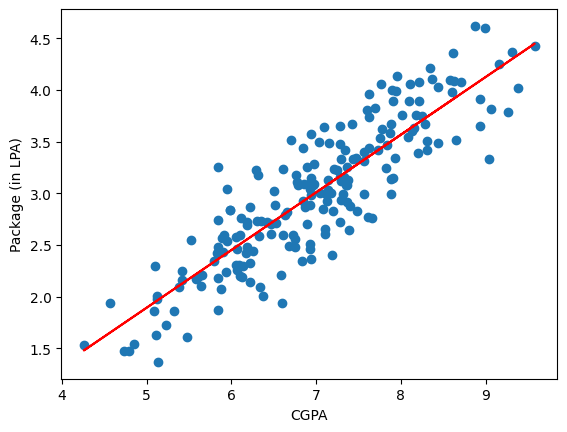

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
y_pred = lr.predict(x_test)

In [18]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [19]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [20]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495532


In [21]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.3482705171773162


In [22]:
print('MSE',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [23]:
# Adjusted R2 score
x_test.shape

(40, 1)

In [24]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [25]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.974592,3.26
1,5.12,0.658950,1.98
2,7.82,0.968655,3.25
3,7.42,0.355948,3.67
4,6.94,0.941920,3.57


Text(0, 0.5, 'Package(in lpa)')

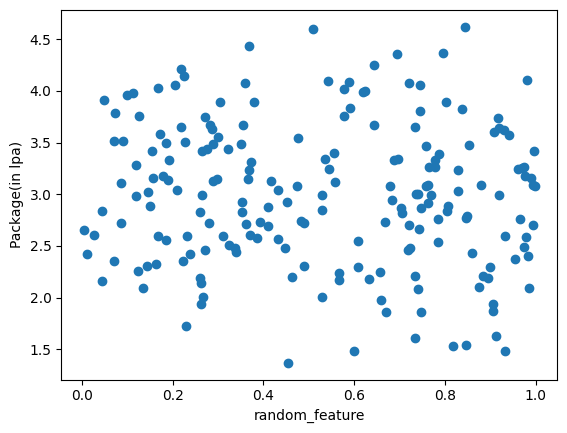

In [26]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [27]:
X= new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [28]:
X

,cgpa,random_feature
0,6.89,0.974592
1,5.12,0.658950
2,7.82,0.968655
3,7.42,0.355948
4,6.94,0.941920
...,...,...
195,6.93,0.717831
196,5.89,0.431614
197,7.21,0.960381
198,7.63,0.098925


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7804595526008079


In [32]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7685925013900408